In [1]:
import pandas as pd
import numpy as np
import re
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_excel('map55.xlsx')
df

,state,year,month,actual,Viewing Date,Elevation
0,AK,2012,2012/3/23,3/23,83,580
1,AK,2013,2013/4/11,4/11,101,580
2,AK,2017,2017/3/22,3/22,81,580
3,AK,2018,2018/3/11,3/11,70,580
4,AK,2019,2019/3/16,3/16,75,580
...,...,...,...,...,...,...
503,WY,2013,2013/4/15,4/15,105,2044
504,WY,2015,2015/4/09,4/09,99,2044
505,WY,2016,2016/3/28,3/28,88,2044
506,WY,2018,2018/4/02,4/02,92,2044


In [3]:
df_1=df[df['year']==2021]
df_1=df_1.reset_index(drop=True)

In [4]:
df_1=df_1[['Viewing Date','Elevation']]
df_1

,Viewing Date,Elevation
0,79,198
1,79,1251
2,73,885
3,65,2074
4,89,153
5,69,46
6,81,18
7,68,31
8,70,183
9,89,336


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn import linear_model
import matplotlib.pyplot as plt

In [7]:
model=linear_model.LinearRegression()
x=np.array(df_1['Viewing Date']).reshape(-1, 1)
y=np.array(df_1['Elevation']).reshape(-1, 1)
model.fit(y,x)
display(model.intercept_)
display(model.coef_)

array([78.10257252])

array([[0.00172354]])

In [8]:
from math import sqrt
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(model.predict(y),x))

6.867422420841186

In [9]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(model.predict(y),x)

5.349199897834758

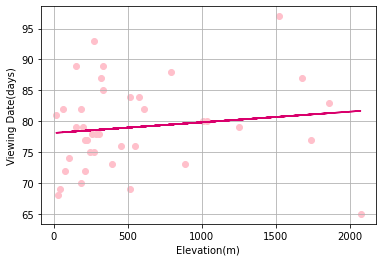

In [10]:
plt.scatter(y,x,c='pink') 
plt.plot(y,model.predict(y),color='#D9006C') 
plt.grid()
plt.xlabel('Elevation(m)')
plt.ylabel('Viewing Date(days)')
plt.savefig('elevation.png',dpi=300)